# Analysis Notebook
- Here we load the pickle files of both runs and analyze them

In [35]:
import pickle
import os
import matplotlib.pyplot as plt

def load_pickle_objects():
    first_run_dir = "./pickle_objects"
    second_run_dir = "./pickle_objects_2"

    # Prepare run lists
    sinus_ratios_sorted_1 = [[],[],[]]
    radial_ratios_sorted_1 = [[],[],[]]
    meandering_ratios_sorted_1 = [[],[],[]]

    sinus_ratios_sorted_2 = [[],[],[]]
    radial_ratios_sorted_2 = [[],[],[]]
    meandering_ratios_sorted_2 = [[],[],[]]


    # tmp ratios sorted



    for file in os.listdir(first_run_dir):
        with open(f"{first_run_dir}/{file}", "rb") as f:
            if file.startswith("0"):
                if file.find("0_3") != -1:
                    sinus_ratios_sorted_1[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    sinus_ratios_sorted_1[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    sinus_ratios_sorted_1[2].append(pickle.load(f))
            elif file.startswith("2"):
                if file.find("0_3") != -1:
                    radial_ratios_sorted_1[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    radial_ratios_sorted_1[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    radial_ratios_sorted_1[2].append(pickle.load(f))
            else:
                if file.find("0_3") != -1:
                    meandering_ratios_sorted_1[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    meandering_ratios_sorted_1[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    meandering_ratios_sorted_1[2].append(pickle.load(f))
    for file in os.listdir(second_run_dir):
        with open(f"{second_run_dir}/{file}", "rb") as f:
            if file.startswith("0"):
                if file.find("0_3") != -1:
                    sinus_ratios_sorted_2[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    sinus_ratios_sorted_2[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    sinus_ratios_sorted_2[2].append(pickle.load(f))
            elif file.startswith("2"):
                if file.find("0_3") != -1:
                    radial_ratios_sorted_2[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    radial_ratios_sorted_2[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    radial_ratios_sorted_2[2].append(pickle.load(f))
            else:
                if file.find("0_3") != -1:
                    meandering_ratios_sorted_2[0].append(pickle.load(f))
                elif file.find("0_5") != -1:
                    meandering_ratios_sorted_2[1].append(pickle.load(f))
                elif file.find("0_7") != -1:
                    meandering_ratios_sorted_2[2].append(pickle.load(f))

    for i in range(len(sinus_ratios_sorted_1)):
        print(f"Length sinus ratio list 1: {len(sinus_ratios_sorted_1[i])}")
        print(f"Length radial ratio list 1: {len(radial_ratios_sorted_1[i])}")
        print(f"Length meandering ratio list 1: {len(meandering_ratios_sorted_1[i])}")
        print(f"Length sinus ratio list 2: {len(sinus_ratios_sorted_2[i])}")
        print(f"Length radial ratio list 2: {len(radial_ratios_sorted_2[i])}")
        print(f"Length meandering ratio list 2: {len(meandering_ratios_sorted_2[i])}")
    
    # Make run pairs:
    sin_sorted_both = (sinus_ratios_sorted_1, sinus_ratios_sorted_2)
    radial_sorted_both = (radial_ratios_sorted_1, radial_ratios_sorted_2)
    meandering_sorted_both = (meandering_ratios_sorted_1, meandering_ratios_sorted_2)

    # Make return tuple of all 3
    return (sin_sorted_both, radial_sorted_both, meandering_sorted_both)
    

## Sort per ratio

Length sinus ratio list 1: 31
Length radial ratio list 1: 31
Length meandering ratio list 1: 31
Length sinus ratio list 2: 31
Length radial ratio list 2: 31
Length meandering ratio list 2: 31
Length sinus ratio list 1: 31
Length radial ratio list 1: 31
Length meandering ratio list 1: 31
Length sinus ratio list 2: 31
Length radial ratio list 2: 31
Length meandering ratio list 2: 31
Length sinus ratio list 1: 31
Length radial ratio list 1: 31
Length meandering ratio list 1: 31
Length sinus ratio list 2: 31
Length radial ratio list 2: 31
Length meandering ratio list 2: 31
Steps: 5270
Weights: 5270


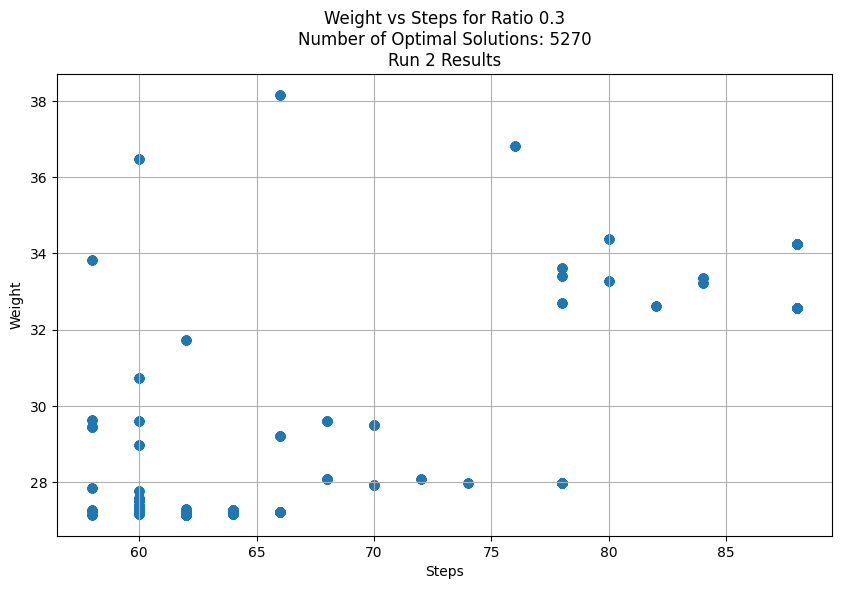

Steps: 9517
Weights: 9517


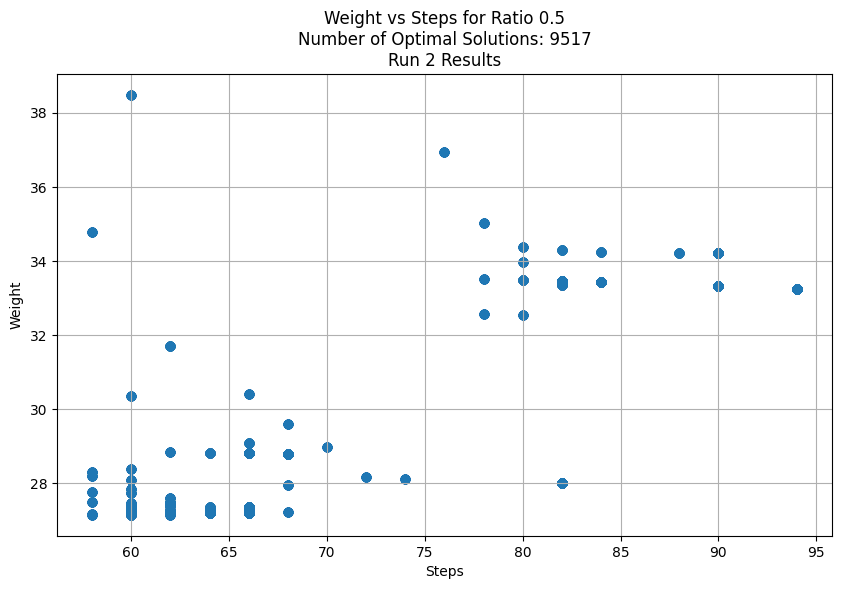

Steps: 6262
Weights: 6262


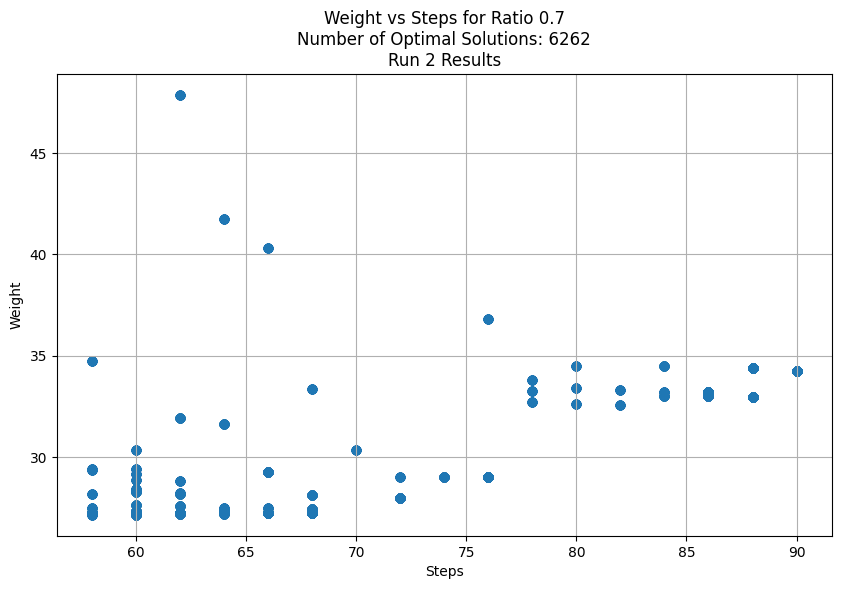

In [ ]:
ratios = [0.3, 0.5, 0.7]
sin_sorted_both, radial_sorted_both, meandering_sorted_both = load_pickle_objects()
for i, ratio in enumerate(sin_sorted_both[1]):
    weights = []
    steps = []
    for run in ratio:
        #print(run["Number_of_Optimal_Solutions"])
        for inner_list in [run["Shifted_Weight"] for run in ratio]:
            for weight in inner_list:
                weights.append(weight)
        
        for inner_list in [run["Steps"] for run in ratio]:
            for step in inner_list:
                steps.append(step)


    print(f"Steps: {len(steps)}")
    print(f"Weights: {len(weights)}")
    plt.figure(figsize=(10, 6))
    plt.scatter(steps, weights, marker='o')   # Line plot with markers 
    plt.xlabel("Steps")
    plt.ylabel("Weight")
    plt.title(f"Weight vs Steps for Ratio {ratios[i]}\nNumber of Optimal Solutions: {len(steps)}\nRun 2 Results")
    plt.grid(True)

    plt.show()

